# Assignment 1
This file covers the solutions to the 4 questions on assignment 1.
1. Generate samples using a given covariance matrix.
2. Create decision boundaries giving class priors.
3. Implement the PCA dimensionality reduction technqiue.
4. Implement the kNN classifier.

In [29]:
# Import Packages
import numpy as np
import matplotlib.pyplot as plt

## Question 1 - Covariance Matrix A

In [2]:
n = 1000
d = 2

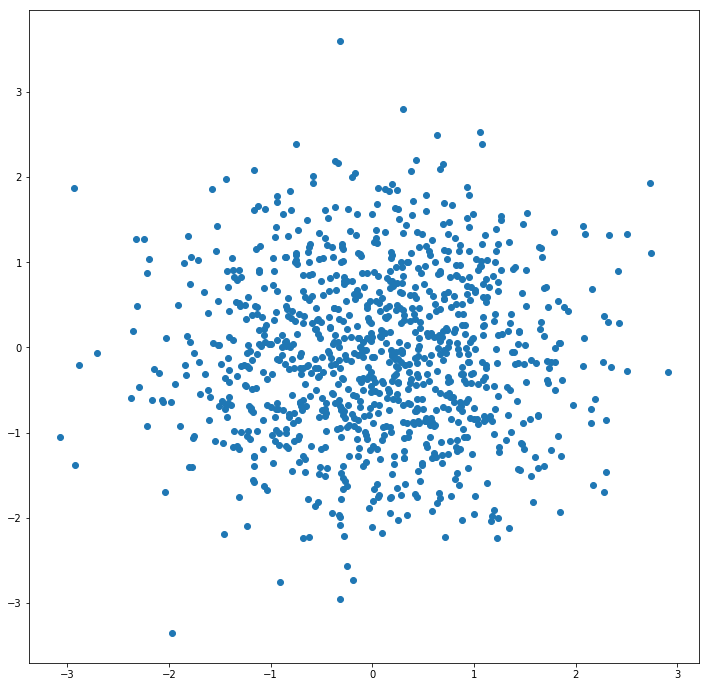

In [44]:
# part a
covariance = np.array([[1, 0],[0, 1]])
np.random.seed(2048)
Y = np.random.randn(n, d)
chol_cov = np.linalg.cholesky(covariance)
Y = np.matmul(Y, chol_cov)

plt.figure(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1])
plt.show()

## Question 1 - Covariance Matrix B

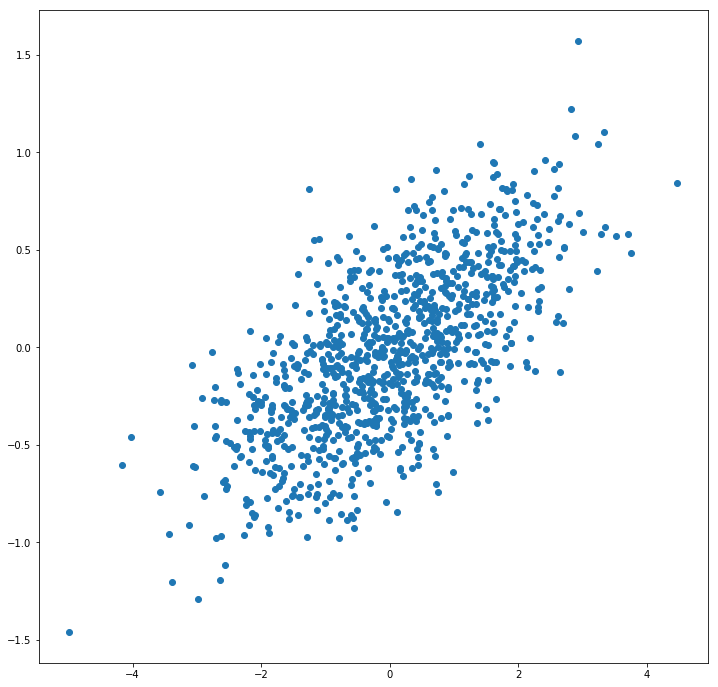

In [42]:
# part a
covariance = np.array([[1, 0.9],[0.9, 1]])
np.random.seed(2048)
Y = np.random.randn(n, d)
chol_cov = np.linalg.cholesky(covariance)
Y = np.matmul(Y, chol_cov)

plt.figure(figsize=(12,12))
plt.scatter(Y[:,0], Y[:,1])
plt.show()